In [75]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pingouin as pg
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Import dataset


In [76]:

df=pd.read_csv("../data/IMDB_movie_reviews_details.csv")

EDA

In [77]:

df.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [78]:
copy_df = df.copy()


In [79]:
copy_df.isnull().any()

Unnamed: 0    False
name          False
year          False
runtime       False
genre         False
rating        False
metascore      True
timeline      False
votes         False
gross          True
dtype: bool

In [80]:
copy_df = copy_df.dropna()


In [81]:
copy_df.votes = copy_df.votes.str. replace(',', '')
copy_df.gross = copy_df.gross.str. replace('$', '')
copy_df.gross = copy_df.gross.str. replace('M','')

C:\Users\nikos\AppData\Local\Temp/ipykernel_23288/3550971038.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  copy_df.gross = copy_df.gross.str. replace('$', '')


In [82]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 998
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  747 non-null    int64  
 1   name        747 non-null    object 
 2   year        747 non-null    object 
 3   runtime     747 non-null    int64  
 4   genre       747 non-null    object 
 5   rating      747 non-null    float64
 6   metascore   747 non-null    float64
 7   timeline    747 non-null    object 
 8   votes       747 non-null    object 
 9   gross       747 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 64.2+ KB


In [83]:
copy_df.year.unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', 'I 2017', '2012', '2009', '1981', '1979',
       '1964', '2004', '1992', '1987', '1986', '1984', '1983', '1976',
       '1973', '1971', '1962', '1959', '1958', '1952', '1944', '1941',
       '1927', '2013', '2007', '2005', '1989', '1965', '1963', '1950',
       '1948', '2017', 'I 2014', 'I 2015', 'I 2013', '2015', '1996',
       '1982', '1978', '1967', '1955', '1951', '1949', '1946', '1940',
       '1939', '1934', '1930', 'I 2004', '1970', '1969', '1961', '1925',
       'II 2016', 'I 2011', 'I 2001', '1947', '1938', '1933', 'I 2010',
       'I 2008', 'I 2007', '1935', 'I 1985', 'III 2018', 'I 2016',
       'II 2015', 'I 1995', '1953'], dtype=object)

In [84]:
year_replacements = {
    "I 2017": "2007",
    "I 2014": "2014",
    "I 2015": "2015",
    "I 2013": "2013",
    "II 2016": "2016",
    "I 2011": "2011",
    "I 2001": "2001",
    "I 2010": "2010",
    "I 2008": "2008",
    "I 2007": "2007",
    "I 1985": "1985",
    "III 2018": "2018",
    "I 2016": "2016",
    "II 2015": "2015",
    "I 1995": "1995",
    'I 2004': '2004'}

In [85]:
copy_df.year = copy_df.year.replace(year_replacements)
copy_df[["year", "votes",'gross']] = copy_df[["year", "votes",'gross']].apply(pd.to_numeric)

In [86]:
copy_df = copy_df.drop(["Unnamed: 0","timeline","name","genre"] ,axis=1)

In [87]:
copy_df.head()

,year,runtime,rating,metascore,votes,gross
0,1994,142,9.3,80.0,2394059,28.34
1,1972,175,9.2,100.0,1658439,134.97
3,2008,152,9.0,84.0,2355907,534.86
4,1974,202,9.0,90.0,1152912,57.30
5,1957,96,9.0,96.0,706079,4.36


In [88]:
copy_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 998
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       747 non-null    int64  
 1   runtime    747 non-null    int64  
 2   rating     747 non-null    float64
 3   metascore  747 non-null    float64
 4   votes      747 non-null    int64  
 5   gross      747 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 40.9 KB


Dataset is ready for MLR

In [89]:
copy_df.head()

,year,runtime,rating,metascore,votes,gross
0,1994,142,9.3,80.0,2394059,28.34
1,1972,175,9.2,100.0,1658439,134.97
3,2008,152,9.0,84.0,2355907,534.86
4,1974,202,9.0,90.0,1152912,57.30
5,1957,96,9.0,96.0,706079,4.36


In [90]:
#correlation
copy_df.describe()

,year,runtime,rating,metascore,votes,gross
count,747.000000,747.000000,747.000000,747.000000,7.470000e+02,747.000000
mean,1994.875502,123.329317,7.937349,77.647925,3.494639e+05,75.201566
std,19.546995,26.065009,0.288260,12.379305,3.590531e+05,113.586971
min,1925.000000,66.000000,7.600000,28.000000,2.521300e+04,0.000000
25%,1985.000000,104.000000,7.700000,70.000000,8.988700e+04,5.010000
50%,2001.000000,120.000000,7.900000,79.000000,2.233840e+05,30.860000
75%,2009.000000,136.000000,8.100000,86.000000,4.969650e+05,100.170000
max,2019.000000,238.000000,9.300000,100.000000,2.394059e+06,936.660000


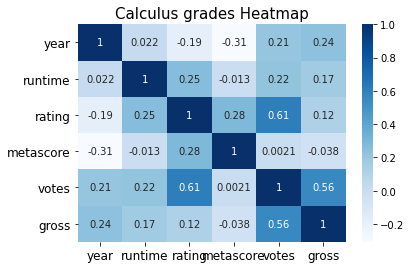

In [91]:
copy_df_corr = copy_df.corr()


sns.heatmap(
    copy_df_corr, annot = True, cmap = 'Blues',
    xticklabels = copy_df_corr.columns.values,
    yticklabels = copy_df_corr.columns.values
);

plt.title('Calculus grades Heatmap', fontsize = 15);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

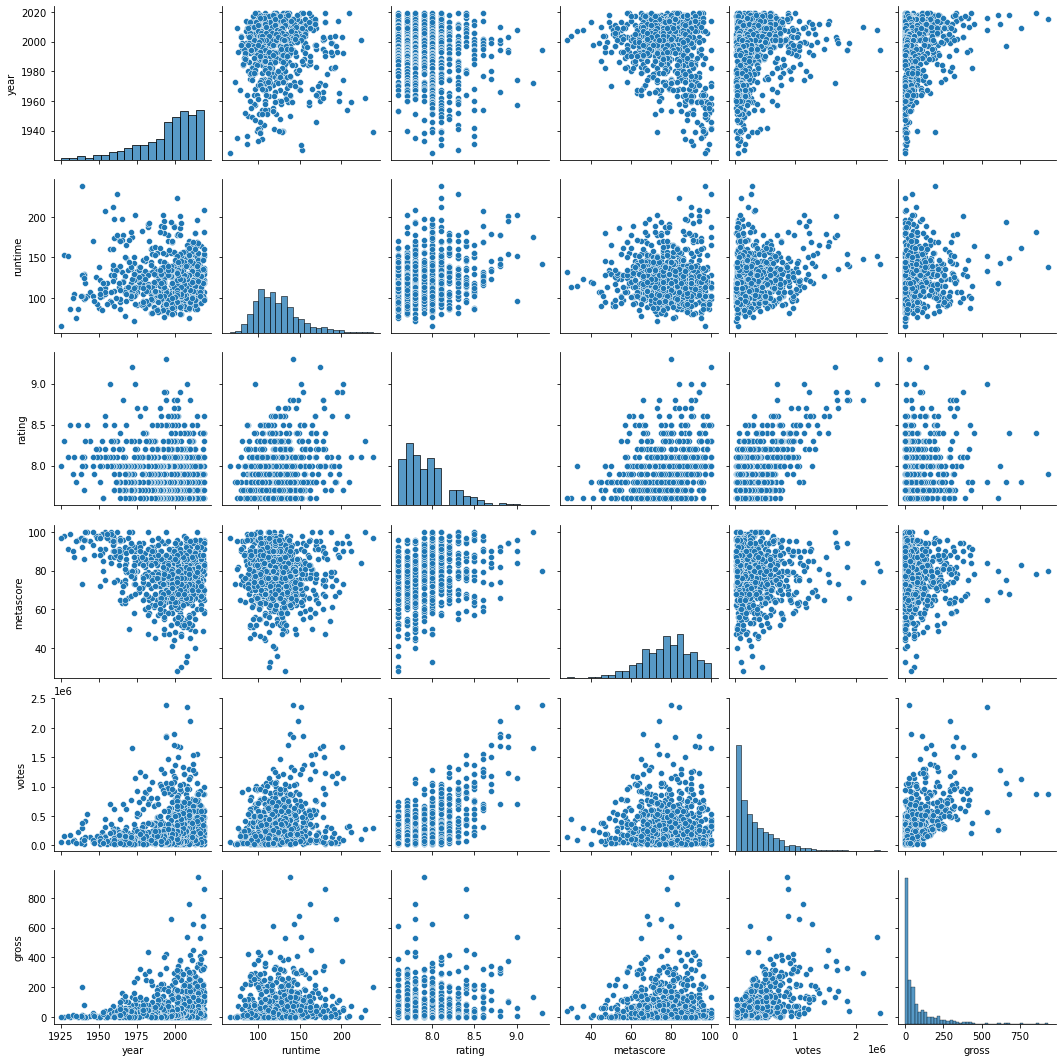

In [92]:
#plots pairs#plots relationships
import seaborn as sb
sb.pairplot(copy_df)
plt.savefig('pairplor.png')


MLR

In [93]:
X = copy_df.loc[ : ,copy_df.columns != 'rating']
y = copy_df['rating'] #ορίζουμε τις X,y

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 4) #χωρίζουμε τα data σε train, test

In [95]:
X_test.shape,  y_test.shape

((225, 5), (225,))

In [96]:
X_train.shape, y_train.shape

((522, 5), (522,))

In [97]:
X = sm.add_constant(X)
X.head(2)


,const,year,runtime,metascore,votes,gross
0,1.0,1994,142,80.0,2394059,28.34
1,1.0,1972,175,100.0,1658439,134.97


In [98]:
ols_results1 = sm.OLS(y, X).fit()
print(ols_results1.summary()) #linear regression train data

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     204.1
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          1.13e-136
Time:                        13:55:28   Log-Likelihood:                 193.14
No. Observations:                 747   AIC:                            -374.3
Df Residuals:                     741   BIC:                            -346.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8425      0.780     17.755      0.0

In [99]:
# Μεγάλο Fstat
# Το μοντέλο μας εξηγεί το 57,9% της βαθμολογίας IMdb
# Όλες οι μεταβλητές φαίνεται να είναι στατιστικά σημαντικές στο 0%

In [100]:
compare_pred_df = pd.DataFrame({'actual_y': y, 'y_hat':ols_results1.fittedvalues})
compare_pred_df.head(10)

,actual_y,y_hat
0,9.3,9.297522
1,9.2,8.978072
3,9.0,8.903698
4,9.0,8.702336
5,9.0,8.382575
6,8.9,8.723614
7,8.9,8.991904
8,8.9,8.671901
9,8.8,8.862607
10,8.8,8.888575


In [101]:
#Δευτερος τροπος

In [103]:
#sikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

In [104]:
yhat

array([7.76396077, 8.07450433, 8.70940954, 8.40304818, 7.97558182,
       7.74231082, 7.90036619, 8.07660668, 7.65195645, 8.47080866,
       7.99309306, 7.94723172, 7.65227697, 7.76964613, 7.99562216,
       7.84592455, 7.8507979 , 7.76185242, 7.86724809, 7.94902901,
       7.84070342, 7.7089773 , 7.95844491, 8.0613893 , 7.78491102,
       7.87302871, 7.93608088, 8.54709724, 7.97096794, 7.84093601,
       8.86353175, 7.8686789 , 7.90892406, 7.76689162, 7.65642634,
       8.08473805, 7.56504211, 7.8379032 , 7.77678966, 7.81426513,
       7.83507546, 8.05140746, 7.8965236 , 9.00724972, 8.02784251,
       7.75991873, 7.76964596, 8.08665856, 7.79618737, 8.02645847,
       7.75231449, 8.13582947, 8.29927805, 7.83115291, 7.93818669,
       7.92396291, 7.83766826, 7.70348088, 7.79623427, 7.96933021,
       7.9049787 , 8.03055359, 8.12101555, 7.53768414, 7.89964621,
       7.79382244, 7.84902874, 7.93356277, 7.83577387, 7.99931996,
       7.81420305, 8.26277153, 7.89628146, 7.76256965, 8.00176

In [105]:
 lr.score(X_test, y_test)

0.4875839021377575

c:\users\nikos\uoa_python_course\uoa_venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\nikos\uoa_python_course\uoa_venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


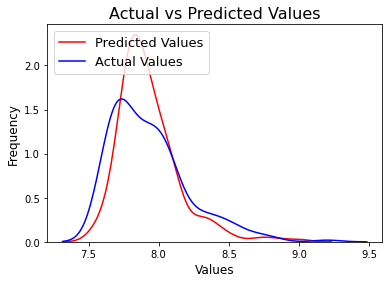

In [106]:
#accuracy for the model
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')